In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

sns.set(style="whitegrid")


In [3]:
df = pd.read_csv(r"C:\Users\Sharukesh D\Downloads\archive (4)\Sample - Superstore.csv",encoding="latin1")

print("Dataset Preview:")
print(df.head())


Dataset Preview:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0  

In [4]:
# Convert dates
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

# Remove duplicates
df.drop_duplicates(inplace=True)

# Handle missing values
df.fillna(method="ffill", inplace=True)

print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


C:\Users\Sharukesh D\AppData\Local\Temp\ipykernel_10548\2900972743.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


In [5]:
print("\nStatistical Summary:")
print(df.describe())

print("\nCorrelation Matrix:")
print(df[["Sales", "Quantity", "Discount", "Profit"]].corr())



Statistical Summary:
            Row ID                     Order Date  \
count  9994.000000                           9994   
mean   4997.500000  2016-04-30 00:07:12.259355648   
min       1.000000            2014-01-03 00:00:00   
25%    2499.250000            2015-05-23 00:00:00   
50%    4997.500000            2016-06-26 00:00:00   
75%    7495.750000            2017-05-14 00:00:00   
max    9994.000000            2017-12-30 00:00:00   
std    2885.163629                            NaN   

                           Ship Date   Postal Code         Sales     Quantity  \
count                           9994   9994.000000   9994.000000  9994.000000   
mean   2016-05-03 23:06:58.571142912  55190.379428    229.858001     3.789574   
min              2014-01-07 00:00:00   1040.000000      0.444000     1.000000   
25%              2015-05-27 00:00:00  23223.000000     17.280000     2.000000   
50%              2016-06-29 00:00:00  56430.500000     54.490000     3.000000   
75%           

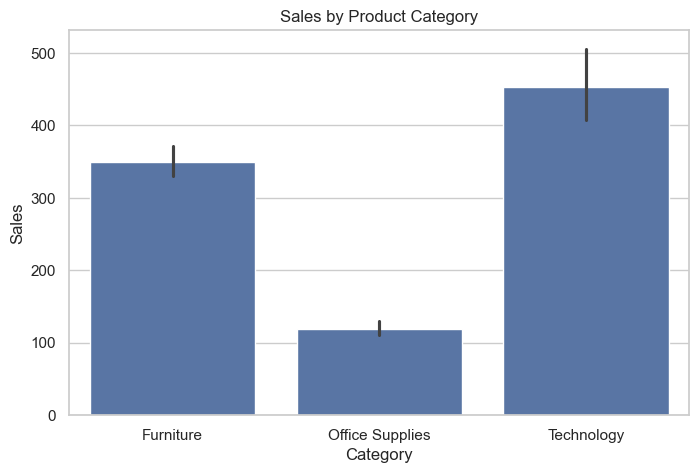

In [6]:
plt.figure(figsize=(8,5))
sns.barplot(x="Category", y="Sales", data=df)
plt.title("Sales by Product Category")
plt.show()


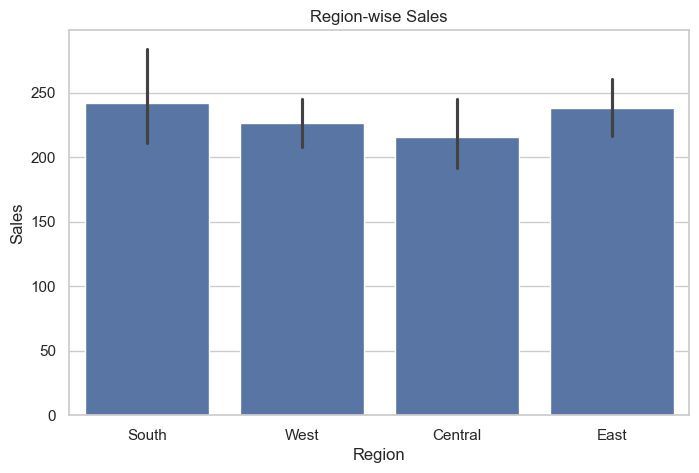

In [7]:
plt.figure(figsize=(8,5))
sns.barplot(x="Region", y="Sales", data=df)
plt.title("Region-wise Sales")
plt.show()


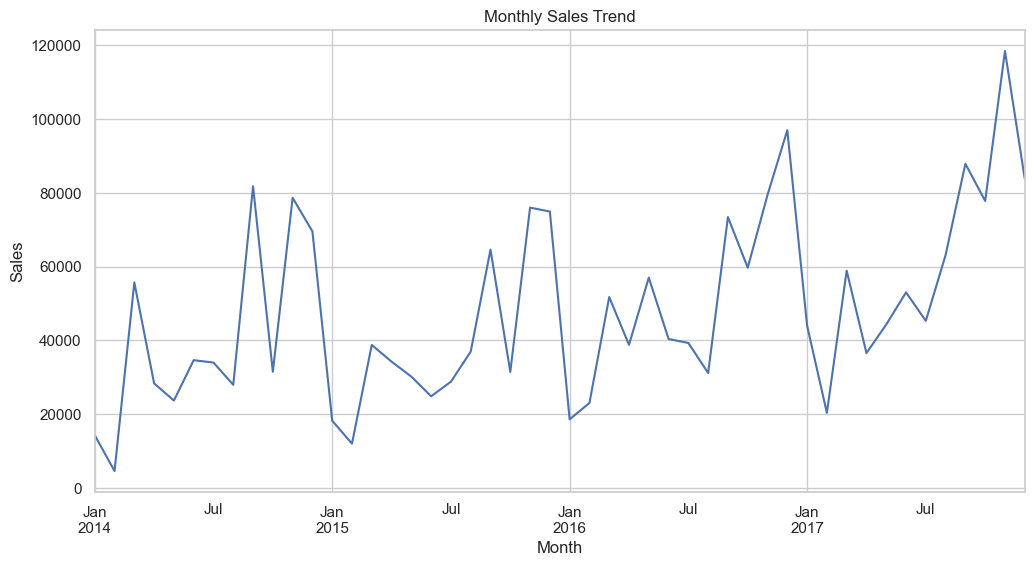

In [8]:
df["Month"] = df["Order Date"].dt.to_period("M")

monthly_sales = df.groupby("Month")["Sales"].sum()

monthly_sales.plot(figsize=(12,6))
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.show()


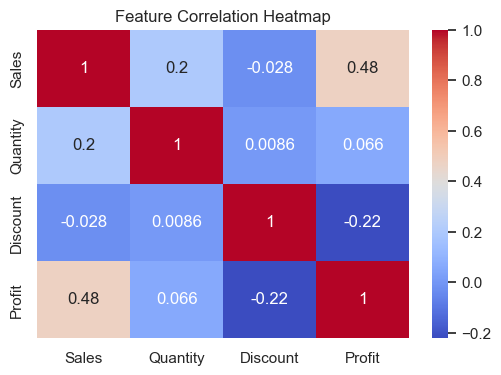

In [9]:
plt.figure(figsize=(6,4))
sns.heatmap(df[["Sales","Quantity","Discount","Profit"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


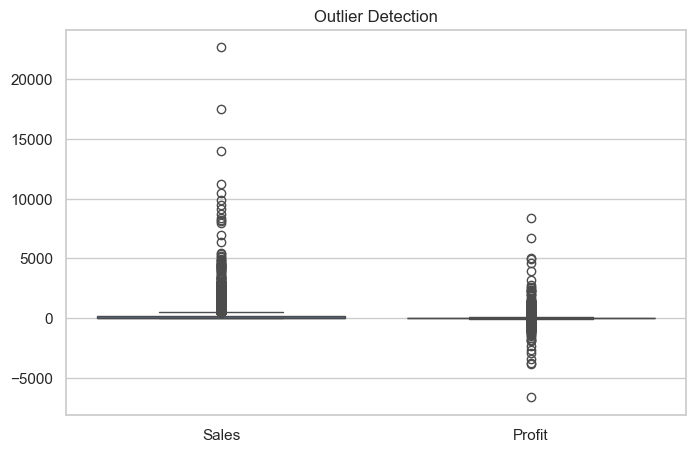

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[["Sales","Profit"]])
plt.title("Outlier Detection")
plt.show()


In [11]:
conn = sqlite3.connect("sales.db")

df.to_sql("sales_table", conn, if_exists="replace", index=False)

query = """
SELECT Region, SUM(Sales) as Total_Sales
FROM sales_table
GROUP BY Region
"""

sql_result = pd.read_sql(query, conn)
print("\nSQL Query Result:")
print(sql_result)


ProgrammingError: Error binding parameter 22: type 'Period' is not supported